In [1]:
""" Fit Normal Distributions with 2 known percentile values """
from scipy.stats import norm
from scipy.optimize import root
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Equations to solve
eq = lambda param, x, q: (norm.cdf(x[0], *param) - q[0], 
                          norm.cdf(x[1], *param) - q[1] )

In [3]:
# The known percentile values
x1, q1 = 352.27, 0.9
x2, q2 = 100, 0.2

In [4]:
# We guess that the roots are somewhere in the middle
guess = ((x1+x2)/2, abs(x1-x2)/2)
sol = root(eq, guess, args=((x1, x2),(q1, q2)))
print(sol.message)
mu, sigma = sol.x
print(f"mu = {mu}, sigma = {sigma}")

The solution converged.
mu = 199.99929759918126, sigma = 118.81746040871225


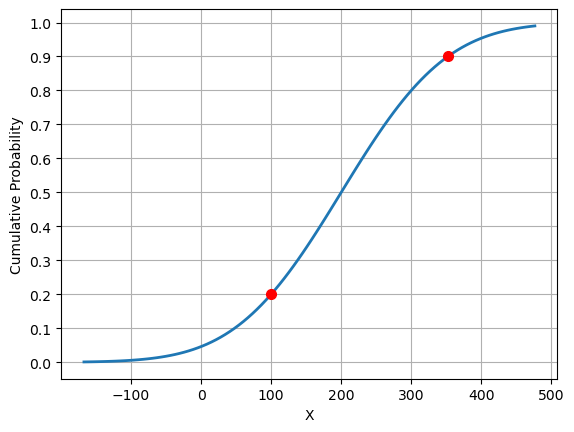

In [5]:
# Plot the results
xmin = norm.ppf(0.001, loc=mu, scale=sigma)
xmax = norm.ppf(0.990, loc=mu, scale=sigma)
x = np.linspace(xmin, xmax, 100)
y = norm.cdf(x, mu, sigma)
fig, ax = plt.subplots()
ax.plot(x, y, lw=2)
ax.plot([x1, x2],[q1,q2],'ro', ms=7)
ax.set_yticks(np.linspace(0, 1, 11))
ax.set_ylabel("Cumulative Probability")
ax.set_xlabel("X")
ax.grid()
plt.show()